In [1]:
!pip install -r /kaggle/input/datasetku/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 3.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found 

In [2]:
!pip install transformers torch

In [3]:
# Core BERTopic and its dependencies
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import umap
import hdbscan

# Data manipulation and general utilities
import pandas as pd
import numpy as np

# Visualization (sering dipakai untuk hasil BERTopic)
import matplotlib.pyplot as plt
import seaborn as sns

# SciPy dan Scikit-learn (dependensi atau alat bantu)
import scipy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Transformers (untuk model bahasa di BERTopic)
import transformers

2025-06-21 09:07:18.223316: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750496838.692570      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750496838.810909      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Memuat model embedding: indobenchmark/indobert-base-p1...
Melatih model BERTopic dengan IndoBERT...

Informasi Topik yang Ditemukan:
     Topic  Count                                 Name  \
0       -1   3150               -1_aplikasi_ga_nya_aja   
1        0    357                         0_ok_tap_it_   
2        1    336               1_good_cool_bad_killer   
3        2    236            2_mantap_ciamik_mantapmi_   
4        3    221     3_bagus_baguss_sangatbagus_cocok   
..     ...    ...                                  ...   
155    154     11        154_jls_keluh_nggak_filturnya   
156    155     11              155_mantapp_bosskuuuy__   
157    156     11        156_mudah_simpleks_pkknya_pot   
158    157     10  157_internet_koneksi_ponsel_minimum   
159    158     10      158_instal_ulang_aplkasi_shulit   

                                        Representation  \
0    [aplikasi, ga, nya, aja, apk, gak, update, yg,...   
1                          [ok, tap, it, , , , , , , ]

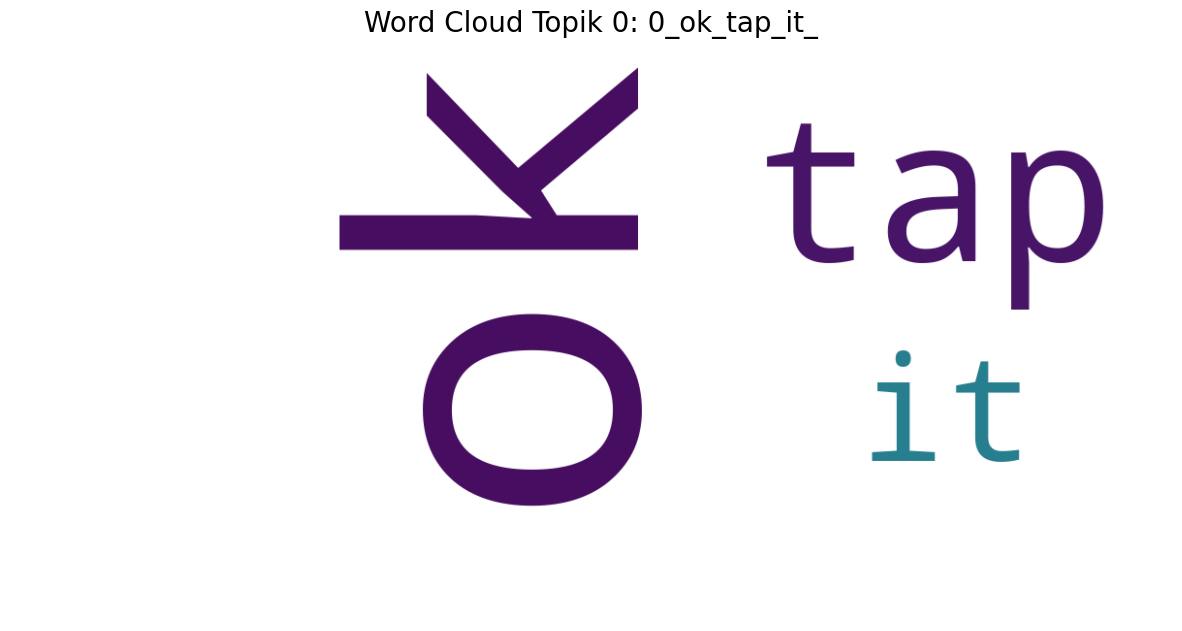

Word Cloud untuk Topik 1 disimpan di: wordclouds_output/wordcloud_topic_1_1_good_cool_bad_killer.png


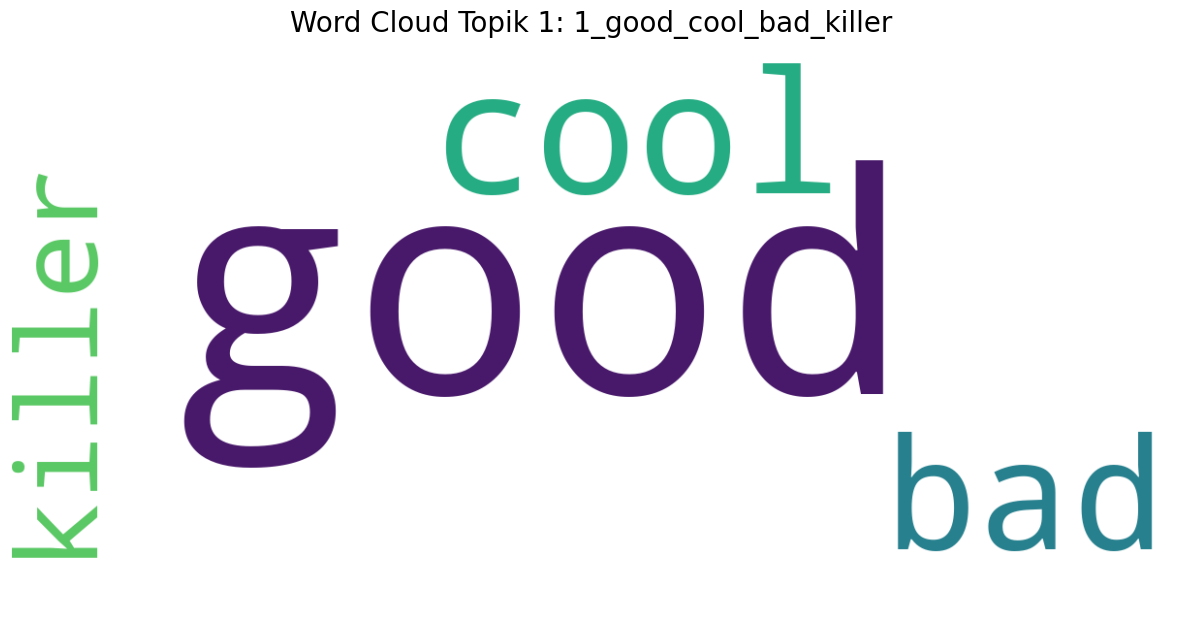

Word Cloud untuk Topik 2 disimpan di: wordclouds_output/wordcloud_topic_2_2_mantap_ciamik_mantapmi_.png


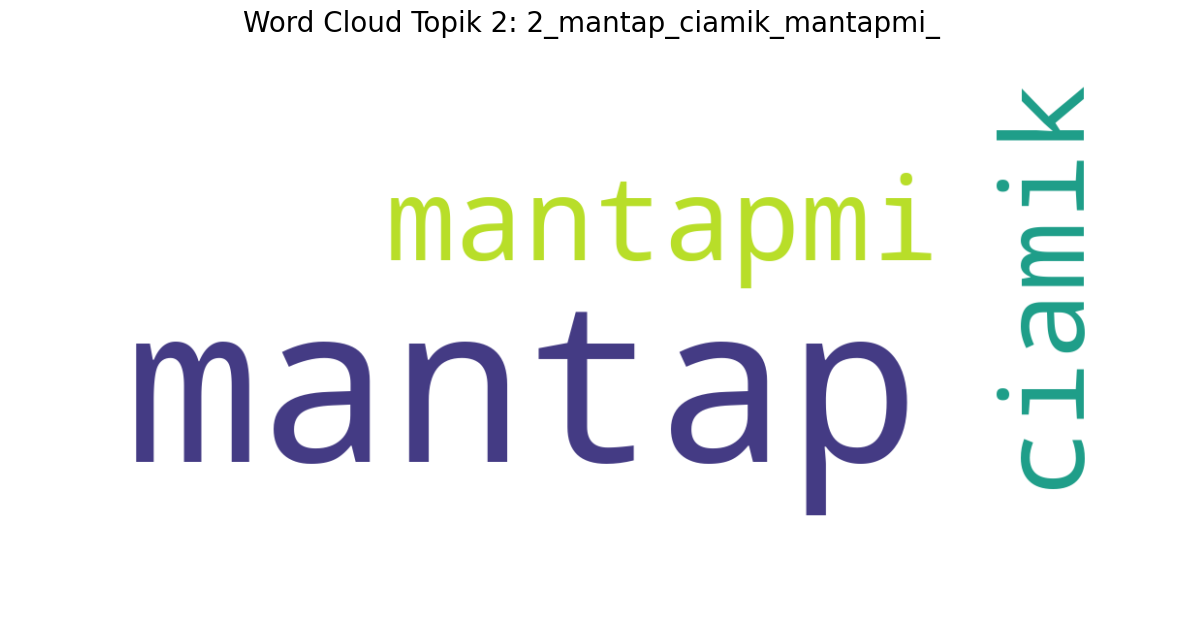

Word Cloud untuk Topik 3 disimpan di: wordclouds_output/wordcloud_topic_3_3_bagus_baguss_sangatbagus_cocok.png


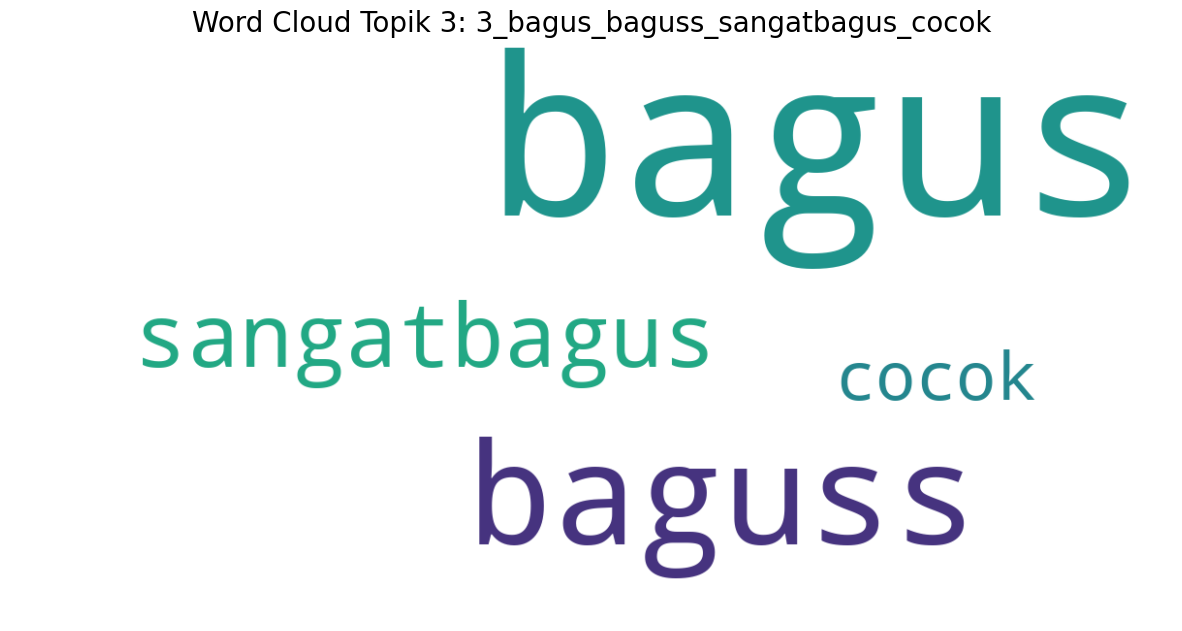

Word Cloud untuk Topik 4 disimpan di: wordclouds_output/wordcloud_topic_4_4____.png


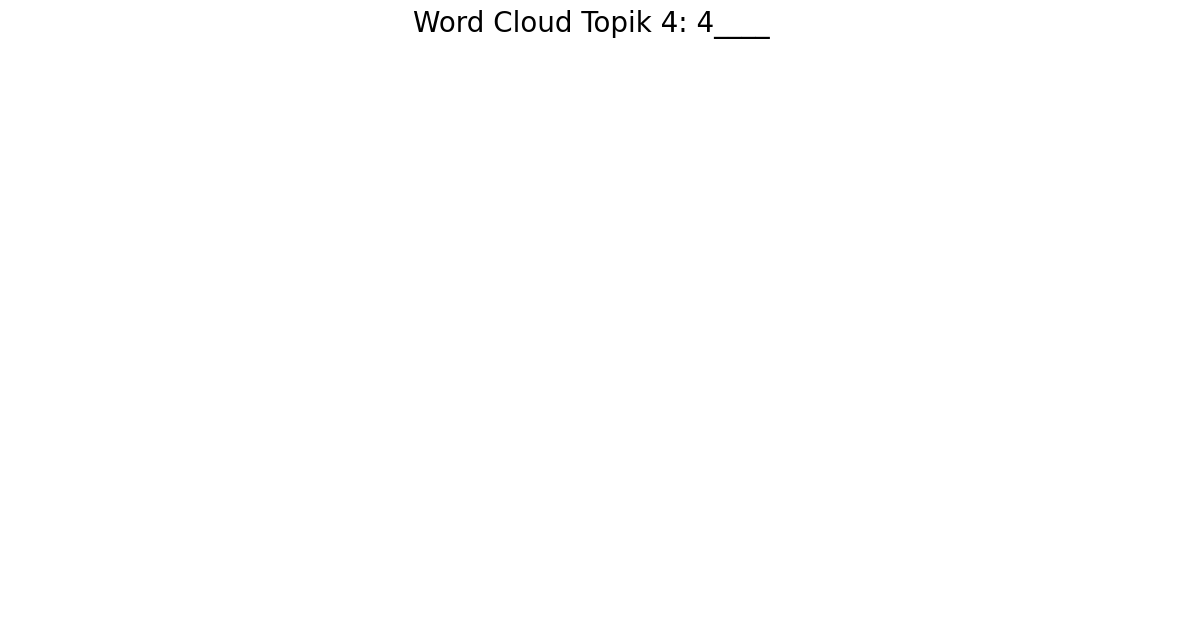

Word Cloud untuk Topik 5 disimpan di: wordclouds_output/wordcloud_topic_5_5____.png


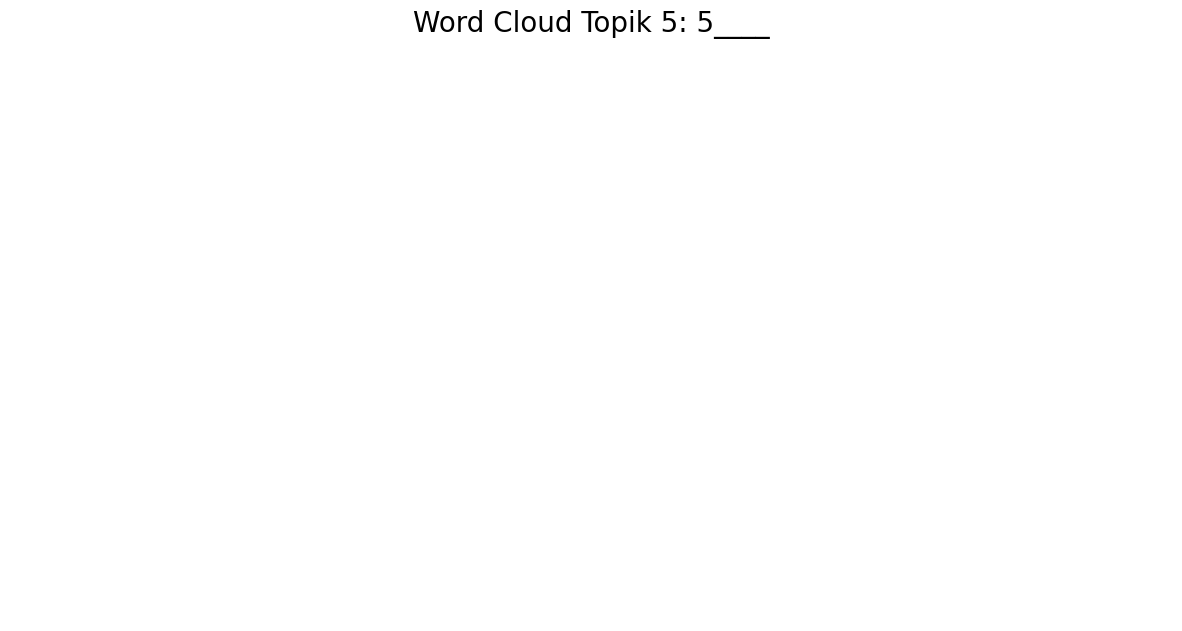

Word Cloud untuk Topik 6 disimpan di: wordclouds_output/wordcloud_topic_6_6_harga_jam_beli_eskrim.png


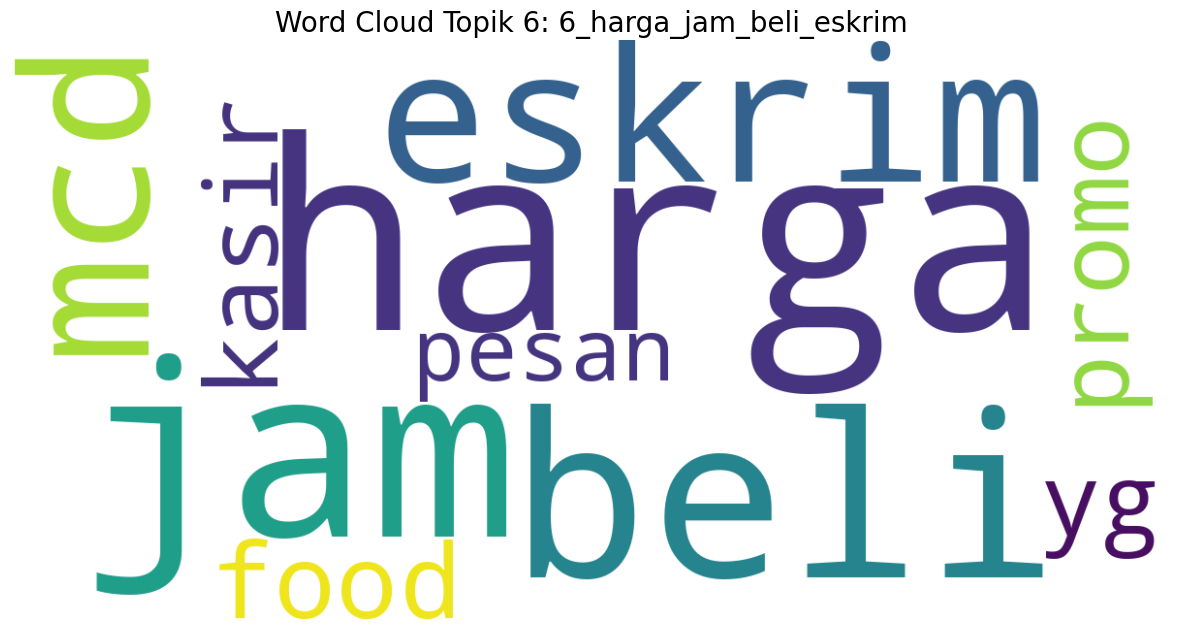


Proses selesai. Semua Word Cloud telah disimpan dan dapat diunduh.
Anda dapat mengunduh file dari folder 'wordclouds_output' di panel file Colab Anda.


In [29]:
import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

file_path = '/kaggle/input/datasetku/review_McD_preprocessed.xlsx'
column_name_with_reviews = 'content_stemmed'

indobert_model_name = "indobenchmark/indobert-base-p1"

if not os.path.exists(file_path):
    print(f"ERROR: File '{file_path}' tidak ditemukan.")
    exit()

df = pd.read_excel(file_path)

if column_name_with_reviews not in df.columns:
    print(f"ERROR: Kolom '{column_name_with_reviews}' tidak ditemukan.")
    exit()

docs = df[column_name_with_reviews].tolist()
docs = [str(doc) for doc in docs if pd.notna(doc) and str(doc).strip() != '']

if not docs:
    print("ERROR: Tidak ada ulasan valid yang ditemukan.")
    exit()

print(f"Memuat model embedding: {indobert_model_name}...")
embedding_model = SentenceTransformer(indobert_model_name)

print("Melatih model BERTopic dengan IndoBERT...")
# Pastikan Anda sudah menginstal dependensi BERTopic yang diperlukan seperti yang kita diskusikan sebelumnya
model = BERTopic(embedding_model=embedding_model, language="indonesian")

topics, probs = model.fit_transform(docs)

topic_info = model.get_topic_info()
print("\nInformasi Topik yang Ditemukan:")
print(topic_info)

# --- BAGIAN YANG DIUBAH UNTUK MEMUNCULKAN HANYA N WORDCLOUD TERATAS DAN BISA DIDOWNLOAD ---
num_wordclouds_to_show = 7 # <<< Tentukan berapa banyak word cloud yang ingin Anda tampilkan
output_dir = 'wordclouds_output' # <<< Direktori untuk menyimpan word cloud

# Buat direktori output jika belum ada
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Direktori '{output_dir}' dibuat untuk menyimpan Word Cloud.")

# Filter topik -1 (noise), urutkan berdasarkan 'Count' (jumlah ulasan) secara menurun,
# dan ambil sejumlah topik teratas yang diinginkan
identified_topics_to_show = topic_info[topic_info['Topic'] != -1].sort_values(by='Count', ascending=False).head(num_wordclouds_to_show)

if identified_topics_to_show.empty:
    print("Tidak ada topik yang teridentifikasi untuk ditampilkan word cloud.")
else:
    print(f"\nMenghasilkan {num_wordclouds_to_show} Word Cloud teratas berdasarkan jumlah ulasan dan menyimpannya...")
    for _, row in identified_topics_to_show.iterrows():
        topic_id = row['Topic']
        topic_name = row['Name']
        # Bersihkan nama topik untuk nama file (buang karakter khusus)
        clean_topic_name = "".join([c if c.isalnum() else "_" for c in topic_name])[:50] # Ambil 50 karakter pertama
        
        words_with_scores = model.get_topic(topic_id)

        if words_with_scores:
            word_freq = {word: score for word, score in words_with_scores}
            wordcloud = WordCloud(width=1200, height=600, background_color='white', collocations=False).generate_from_frequencies(word_freq) # Ukuran diperbesar untuk kualitas lebih baik

            plt.figure(figsize=(15, 8)) # Ukuran figure disesuaikan
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Word Cloud Topik {topic_id}: {topic_name}', fontsize=20) # Ukuran font judul diperbesar

            # --- BARIS KODE BARU UNTUK MENYIMPAN WORD CLOUD ---
            file_name = f'wordcloud_topic_{topic_id}_{clean_topic_name}.png'
            save_path = os.path.join(output_dir, file_name)
            plt.savefig(save_path, dpi=300, bbox_inches='tight') # Simpan dengan DPI tinggi
            print(f"Word Cloud untuk Topik {topic_id} disimpan di: {save_path}")
            # --- AKHIR BARIS KODE BARU ---
            
            plt.show() # Tampilkan juga di Colab
        else:
            print(f"Tidak ada kata kunci yang ditemukan untuk Topik {topic_id}.")

print("\nProses selesai. Semua Word Cloud telah disimpan dan dapat diunduh.")
print(f"Anda dapat mengunduh file dari folder '{output_dir}' di panel file Colab Anda.")

Direktori 'barcharts_top_words' dibuat.

Menghasilkan 7 Bar Chart teratas...
Bar Chart Topik 0 disimpan di: barcharts_top_words/barchart_topic_0_0_ok_tap_it_.png
Bar Chart Topik 1 disimpan di: barcharts_top_words/barchart_topic_1_1_good_cool_bad_killer.png
Bar Chart Topik 2 disimpan di: barcharts_top_words/barchart_topic_2_2_mantap_ciamik_mantapmi_.png
Bar Chart Topik 3 disimpan di: barcharts_top_words/barchart_topic_3_3_bagus_baguss_sangatbagus_cocok.png
Bar Chart Topik 4 disimpan di: barcharts_top_words/barchart_topic_4_4____.png
Bar Chart Topik 5 disimpan di: barcharts_top_words/barchart_topic_5_5____.png
Bar Chart Topik 6 disimpan di: barcharts_top_words/barchart_topic_6_6_harga_jam_beli_eskrim.png

Proses selesai. Bar Chart dapat diunduh.


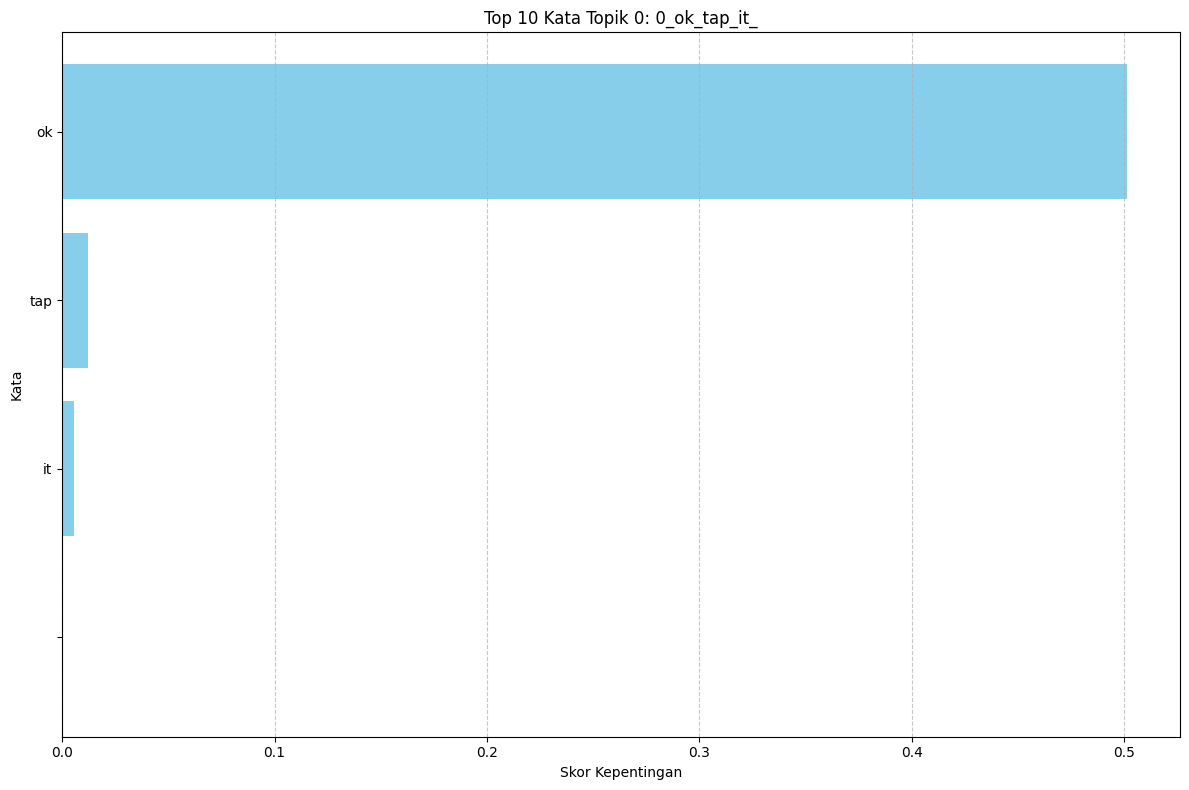

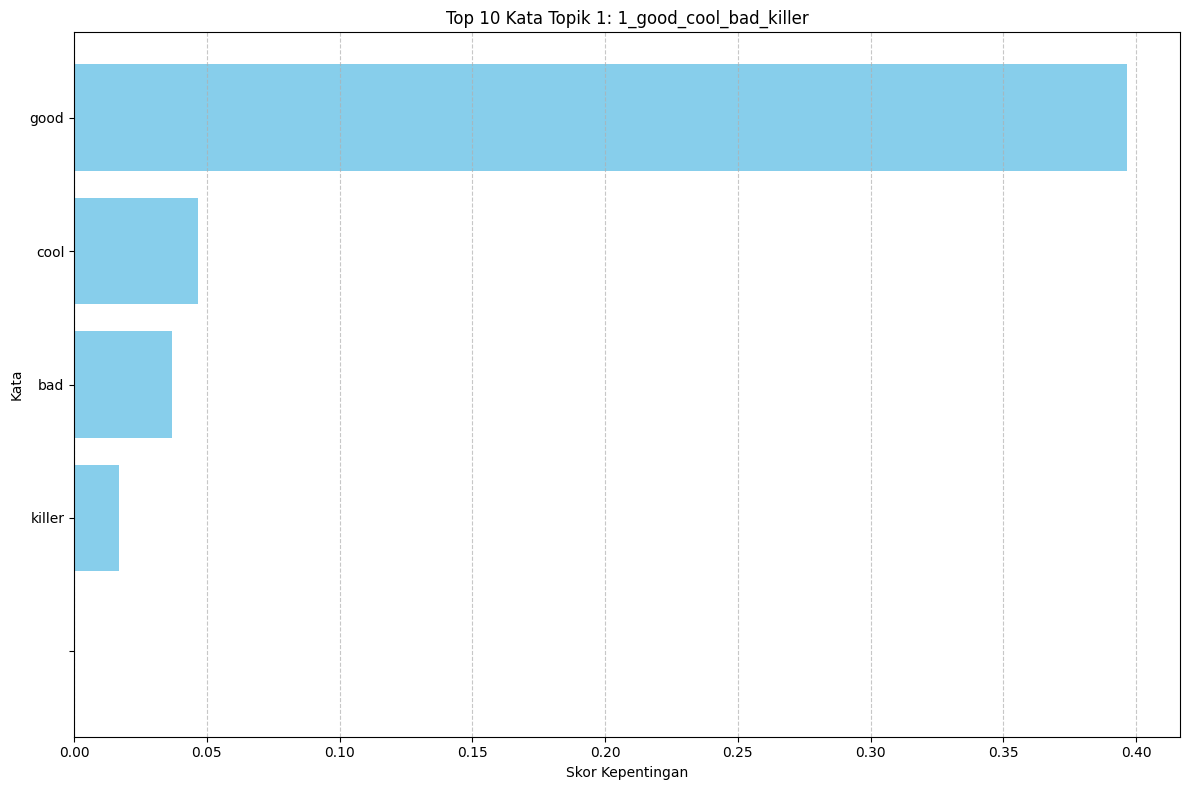

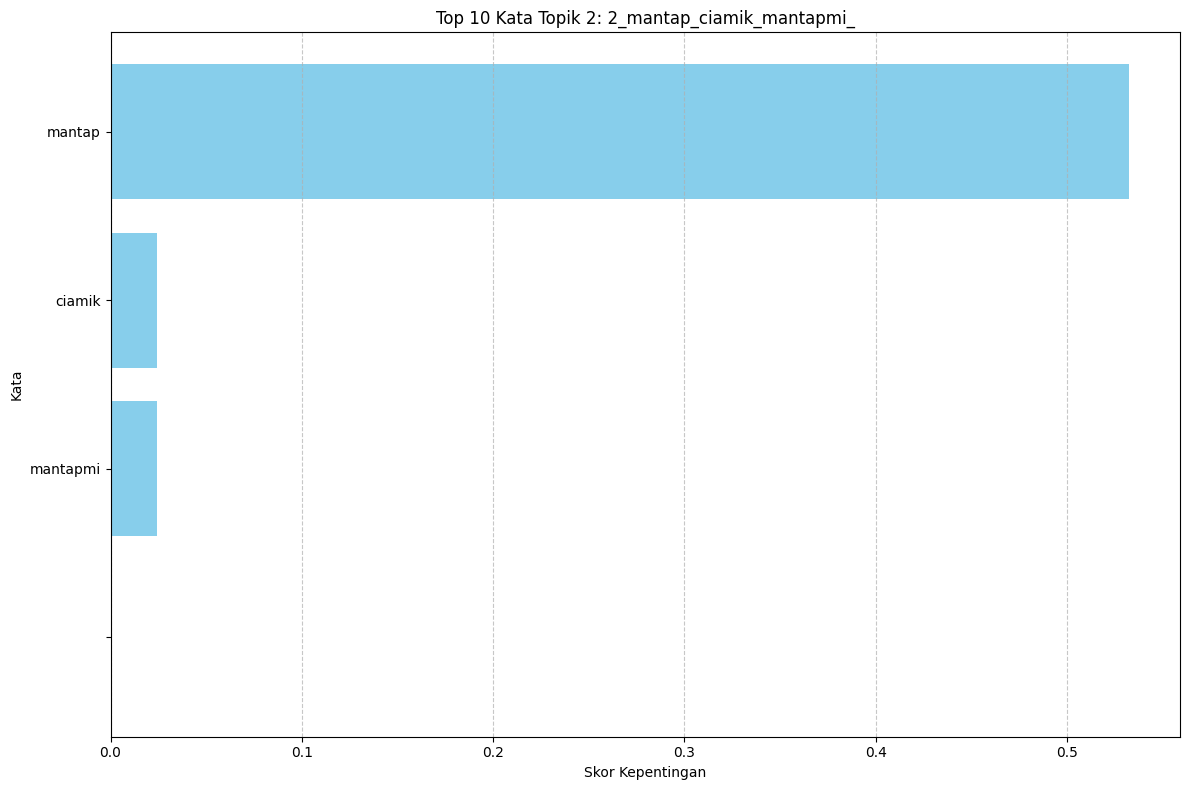

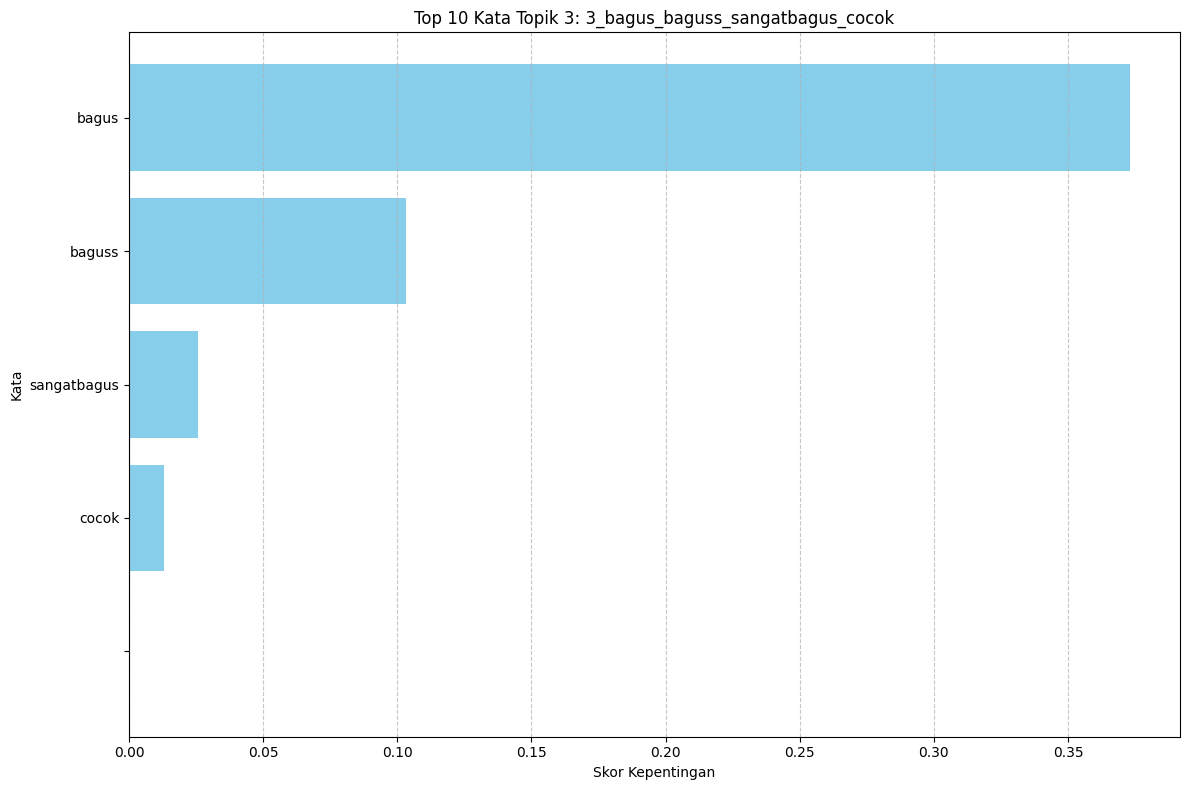

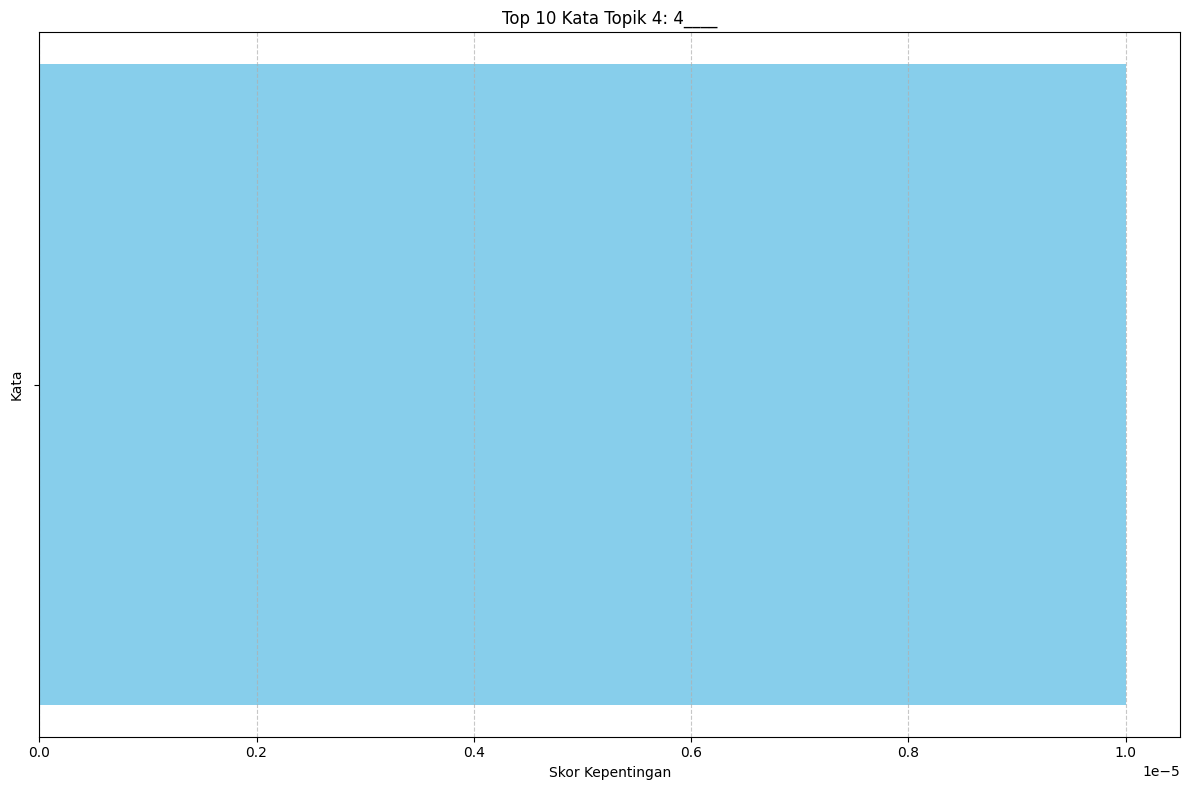

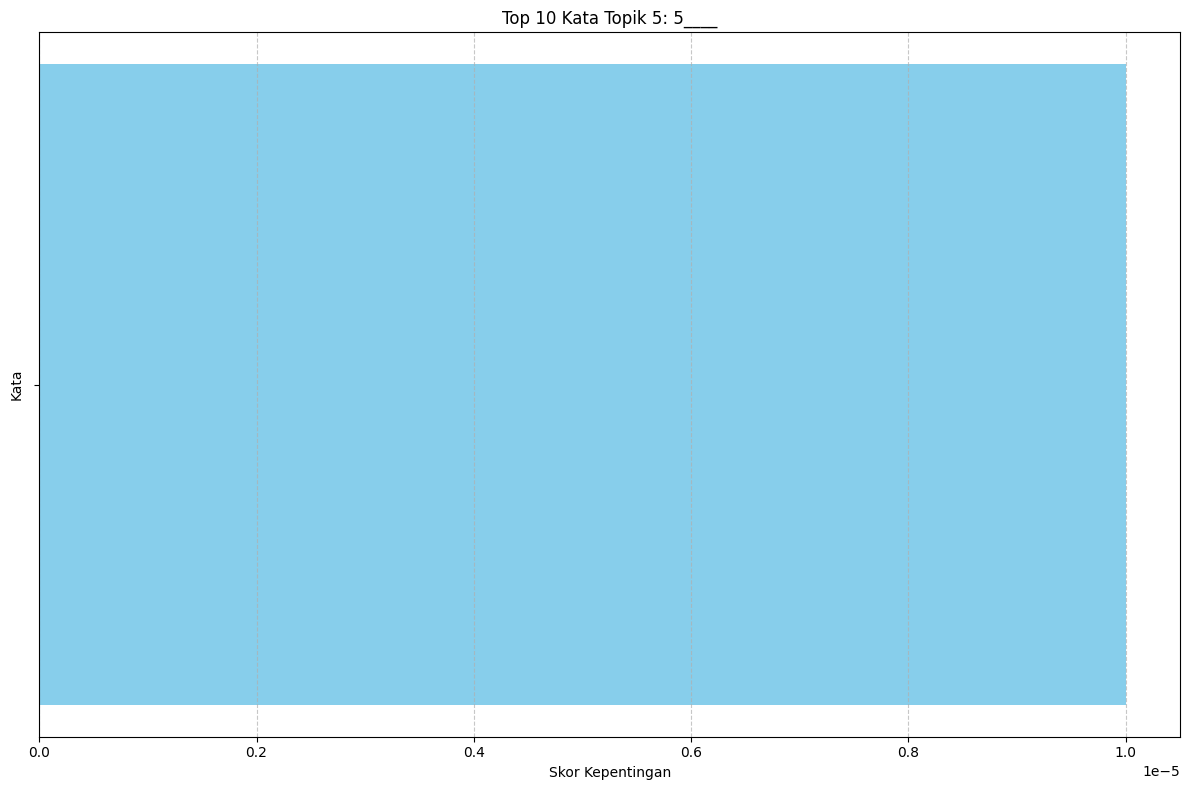

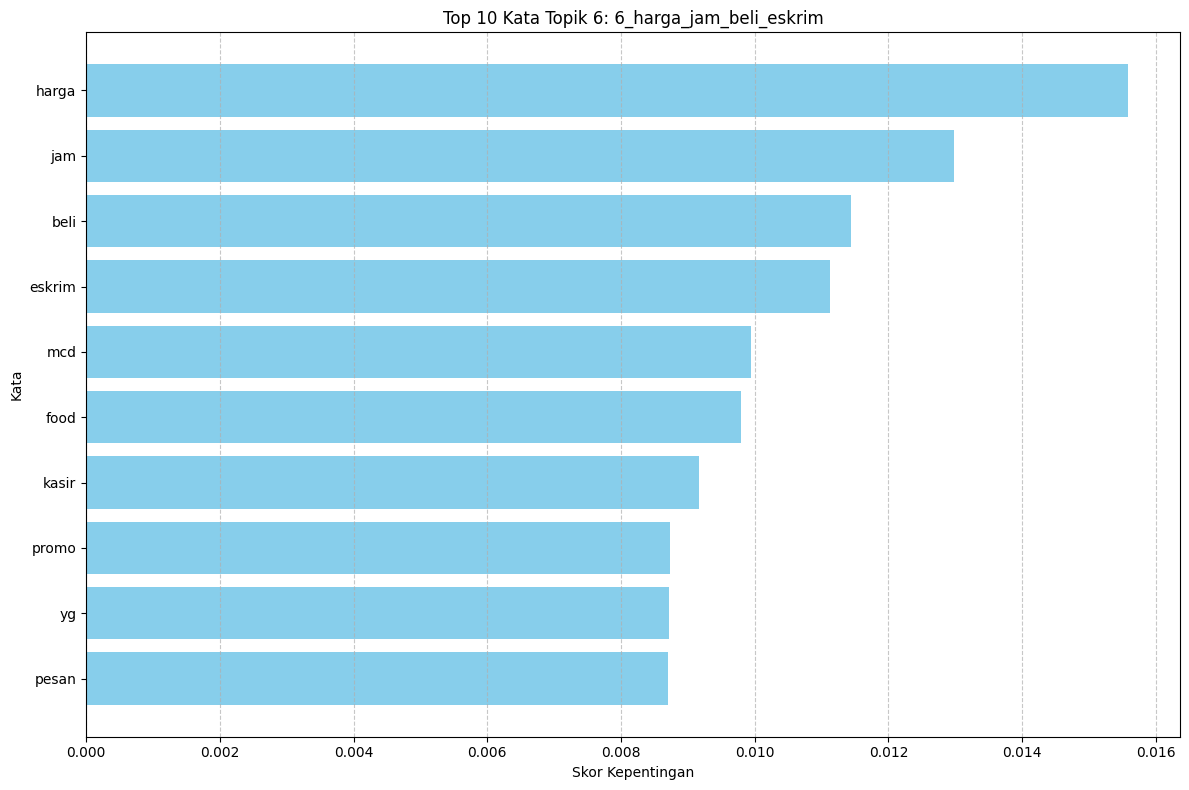

In [30]:
import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import os


# Buat direktori output
if not os.path.exists(output_dir_barcharts):
    os.makedirs(output_dir_barcharts)
    print(f"Direktori '{output_dir_barcharts}' dibuat.")

# Filter topik dan buat bar chart
identified_topics_to_chart = topic_info[topic_info['Topic'] != -1].sort_values(by='Count', ascending=False).head(num_topics_to_chart)

if identified_topics_to_chart.empty:
    print("Tidak ada topik yang teridentifikasi untuk membuat bar chart.")
else:
    print(f"\nMenghasilkan {num_topics_to_chart} Bar Chart teratas...")
    for _, row in identified_topics_to_chart.iterrows():
        topic_id = row['Topic']
        topic_name = row['Name']
        clean_topic_name = "".join([c if c.isalnum() else "_" for c in topic_name])[:50]

        words_with_scores = model.get_topic(topic_id)

        if words_with_scores:
            top_10_words_data = sorted(words_with_scores, key=lambda item: item[1], reverse=True)[:10]
            words = [item[0] for item in top_10_words_data]
            scores = [item[1] for item in top_10_words_data]

            plt.figure(figsize=(12, 8))
            plt.barh(words[::-1], scores[::-1], color='skyblue')
            plt.xlabel('Skor Kepentingan')
            plt.ylabel('Kata')
            plt.title(f'Top 10 Kata Topik {topic_id}: {topic_name}')
            plt.xticks(fontsize=10)
            plt.yticks(fontsize=10)
            plt.grid(axis='x', linestyle='--', alpha=0.7)
            plt.tight_layout()

            save_path = os.path.join(output_dir_barcharts, f'barchart_topic_{topic_id}_{clean_topic_name}.png')
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Bar Chart Topik {topic_id} disimpan di: {save_path}")
        else:
            print(f"Tidak ada kata kunci untuk Topik {topic_id}.")

print("\nProses selesai. Bar Chart dapat diunduh.")

In [37]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize
import warnings
import sys
import re # Import modul regex untuk pembersihan tambahan

warnings.filterwarnings("ignore", category=UserWarning, module='nltk.downloader')

print("--- Memulai Diagnostik Coherence Score (Pembersihan Token Lebih Agresif) ---")

# Asumsi: 'model' (objek BERTopic yang sudah dilatih) dan 'docs' (list of string dokumen) sudah ada.

# Fungsi pembersih token
def clean_tokens(tokens):
    # Hapus string kosong, non-alfanumerik, dan token terlalu pendek setelah tokenisasi
    cleaned = []
    for token in tokens:
        token = token.strip()
        # Hapus tanda baca/karakter non-kata lainnya, kecuali jika itu bagian dari kata
        token = re.sub(r'[^a-z0-9]', '', token) # Hapus apapun selain a-z dan 0-9
        if token and len(token) > 1: # Filter token kosong atau terlalu pendek (misal: 'a', 'i')
            cleaned.append(token)
    return cleaned

# 1. Ekstraksi dan Verifikasi Representasi Topik dari BERTopic
topic_words_list = []
print("\n--- Proses Ekstraksi Kata Topik (dengan pembersihan) ---")

all_topic_representations = model.get_topics()

for topic_id in sorted(all_topic_representations.keys()):
    if topic_id == -1:
        continue

    current_topic_raw = all_topic_representations.get(topic_id)
    words_for_current_topic = []

    if current_topic_raw:
        for item in current_topic_raw:
            if isinstance(item, tuple) and len(item) == 2 and isinstance(item[0], str):
                words_for_current_topic.append(item[0])
            # else: # Debugging jika ada elemen yang tidak sesuai format tuple
            #    print(f"DEBUG: Peringatan! Topik {topic_id} mengandung elemen yang tidak sesuai format (bukan (str, float) tuple): {item} (tipe: {type(item)})")

    # Bersihkan kata-kata topik yang diekstrak
    cleaned_topic_words = clean_tokens(words_for_current_topic)

    if cleaned_topic_words: # Hanya tambahkan topik yang memiliki kata-kata valid setelah dibersihkan
        topic_words_list.append(cleaned_topic_words)
    # else: # Debugging jika topik menjadi kosong setelah dibersihkan
    #    print(f"DEBUG: Peringatan! Topik {topic_id} kosong setelah pembersihan ketat.")


print("\n--- Ringkasan Format Input TOPICS setelah pembersihan ---")
if not topic_words_list:
    print("ERROR FATAL: 'topic_words_list' kosong setelah pembersihan. Tidak ada topik valid yang dapat diproses.")
    sys.exit(1)
else:
    print(f"Jumlah topik yang akan diproses: {len(topic_words_list)}")
    print(f"Tipe 'topic_words_list': {type(topic_words_list)}")
    print(f"Tipe elemen pertama 'topic_words_list': {type(topic_words_list[0])}")
    print(f"Tipe elemen pertama dari topik pertama: {type(topic_words_list[0][0])}")
    print(f"Contoh 3 topik pertama (setelah pembersihan): {topic_words_list[:min(3, len(topic_words_list))]}")


# 2. Persiapan Dokumen untuk Gensim (Corpus dan Dictionary)
print("\n--- Proses Tokenisasi Dokumen dan Verifikasi Format (dengan pembersihan) ---")
try:
    # Tokenisasi dokumen menggunakan NLTK
    raw_tokenized_docs = [word_tokenize(doc.lower()) for doc in docs]

    # Bersihkan tokenized_docs
    tokenized_docs = [clean_tokens(doc_tokens) for doc_tokens in raw_tokenized_docs]

    # Filter dokumen yang menjadi kosong setelah pembersihan
    tokenized_docs = [doc for doc in tokenized_docs if doc]

    print(f"Jumlah dokumen yang di-tokenisasi & dibersihkan: {len(tokenized_docs)}")
    print(f"Tipe 'tokenized_docs': {type(tokenized_docs)}")
    print(f"Tipe elemen pertama 'tokenized_docs': {type(tokenized_docs[0])}")
    print(f"Tipe elemen pertama dari dokumen pertama: {type(tokenized_docs[0][0])}")
    print(f"Contoh 3 dokumen pertama yang di-tokenisasi & dibersihkan: {tokenized_docs[:min(3, len(tokenized_docs))]}")

    # Buat dictionary dan corpus hanya jika ada dokumen yang valid
    if not tokenized_docs:
        print("ERROR FATAL: 'tokenized_docs' kosong setelah pembersihan. Tidak ada dokumen valid untuk membuat dictionary/corpus.")
        sys.exit(1)

    dictionary = Dictionary(tokenized_docs)
    corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
    print(f"Ukuran dictionary: {len(dictionary)}")
    print(f"Ukuran corpus: {len(corpus)}")

except LookupError:
    print("\nERROR FATAL: Data NLTK 'punkt' tidak ditemukan. Harap jalankan `import nltk; nltk.download('punkt')` di sel terpisah.")
    sys.exit(1)
except Exception as e:
    print(f"\nERROR FATAL: Terjadi kesalahan saat tokenisasi atau membuat dictionary/corpus: {e}")
    sys.exit(1)


# 3. Menghitung Coherence Score
print("\n--- Memulai Perhitungan Coherence Score ---")
try:
    coherence_model = CoherenceModel(topics=topic_words_list,
                                     texts=tokenized_docs,
                                     dictionary=dictionary,
                                     coherence='c_v')

    coherence_score = coherence_model.get_coherence()
    print(f"\nCoherence Score (c_v): {coherence_score:.4f}")

except Exception as e:
    print(f"\nERROR TERJADI SAAT MENGHITUNG COHERENCE SCORE: {e}")
    print("Pesan kesalahan asli: 'unable to interpret topic as either a list of tokens or a list of ids'")
    print("Meskipun sudah dibersihkan, masih ada masalah format. Ini mungkin bug di Gensim atau masalah yang sangat spesifik.")
    print("Pastikan kembali instalasi Gensim dan NLTK Anda, coba restart runtime jika di Colab.")

print("\n--- Proses Diagnostik Coherence Score Selesai ---")

--- Memulai Diagnostik Coherence Score (Pembersihan Token Lebih Agresif) ---

--- Proses Ekstraksi Kata Topik (dengan pembersihan) ---

--- Ringkasan Format Input TOPICS setelah pembersihan ---
Jumlah topik yang akan diproses: 157
Tipe 'topic_words_list': <class 'list'>
Tipe elemen pertama 'topic_words_list': <class 'list'>
Tipe elemen pertama dari topik pertama: <class 'str'>
Contoh 3 topik pertama (setelah pembersihan): [['ok', 'tap', 'it'], ['good', 'cool', 'bad', 'killer'], ['mantap', 'ciamik', 'mantapmi']]

--- Proses Tokenisasi Dokumen dan Verifikasi Format (dengan pembersihan) ---
Jumlah dokumen yang di-tokenisasi & dibersihkan: 8623
Tipe 'tokenized_docs': <class 'list'>
Tipe elemen pertama 'tokenized_docs': <class 'list'>
Tipe elemen pertama dari dokumen pertama: <class 'str'>
Contoh 3 dokumen pertama yang di-tokenisasi & dibersihkan: [['gak', 'buka', 'app', 'nya'], ['daftar', 'menu', 'makan', 'nya', 'tolong', 'tambah', 'tulis', 'angka', 'harga', 'nya', 'beli', 'duit'], ['lawak

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



Coherence Score (c_v): 0.4099

--- Proses Diagnostik Coherence Score Selesai ---
